In [25]:
# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
from classy import Class


In [27]:

# 2) LambdaCDM 6 parameters (Planck 18 + lensing + BAO bestfit) 
fixed_settings = {
                'T_cmb':2.7255,
                'omega_b':0.02238280,
                'omega_cdm':0.1201075,
                'h':0.67810,
                'A_s':2.100549e-09, # amplitude of primodial power spectrum
                'n_s':0.9660499, # scalar spectral index
                'output':'tCl,pCl,lCl', # temperature, polarisation and lensing spectrum 
                'lensing':'yes' # say yes if you want CMB lensing, needs 'lCl'
                }


In [ ]:
def get_Dl_TT(params):
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()

    cl = cosmo.raw_cl(2500)          # TT, EE, TE, BB, ell -> curly l (ℓ)
    T = cosmo.T_cmb()                # CMB temperature

    # Extract multipoles starting at ℓ = 2 , as ℓ= 0,1 represent monopole and dipole due to our motion.
    ell = cl["ell"][2:]
    Cl_TT = cl["tt"][2:]

    # Convert to Dℓ in μK²
    Dl = ell*(ell+1)/(2*np.pi) * Cl_TT * T**2 * 1e12

    cosmo.struct_cleanup()
    cosmo.empty()
    return ell, Dl


In [29]:
# 1) PARAMETER  TO VARY

vary_Omega_k = [-0.09, 0.0, 0.09]   # curvature 
vary_omega_cdm = [0.10, 0.1201075, 0.14]        # matter density

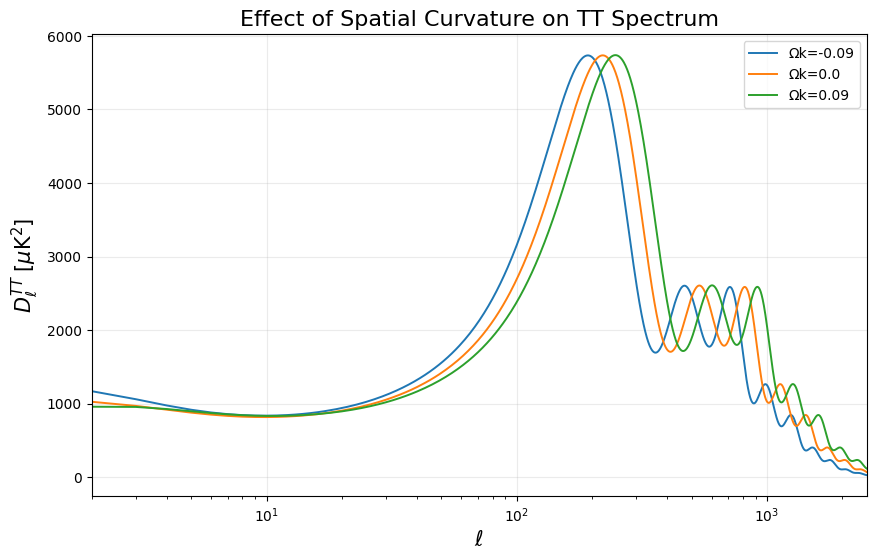

In [ ]:
plt.figure(figsize=(10,6))

for Ok in vary_Omega_k:
    ell, Dl = get_Dl_TT({**fixed_settings, "Omega_k": Ok}) # Calls function get_Dl_TT with updated Omega_k 
    plt.plot(ell, Dl, lw=1.4, label=f"Ωk={Ok}")

plt.xlabel(r"$\ell$", fontsize=15)                     # ← ℓ label
plt.ylabel(r"$D_\ell^{TT}\;[\mu\mathrm{K}^2]$", fontsize=15)
plt.xscale("log")                                      # ← log scale for ℓ
plt.xlim(2, 2500)
plt.legend()
plt.grid(alpha=0.25)
plt.title("Effect of Spatial Curvature on TT Spectrum", fontsize=16)
plt.show()


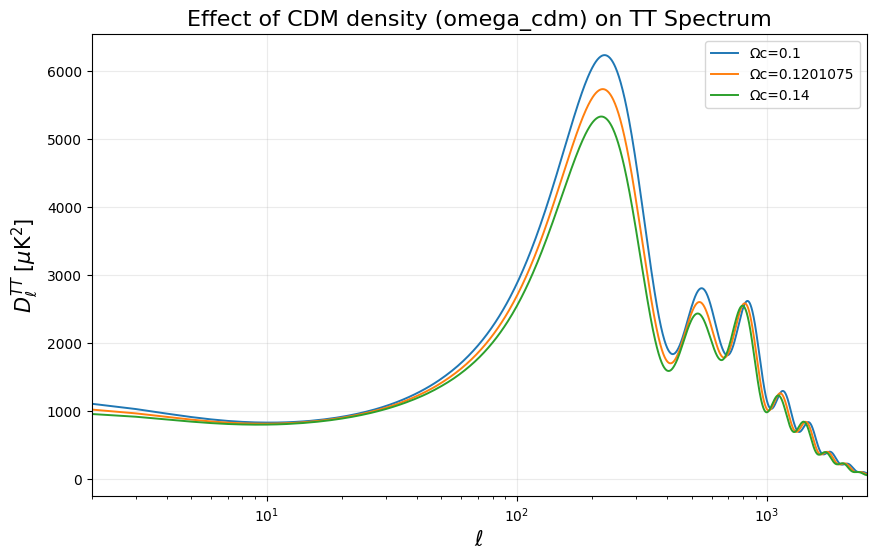

In [31]:
plt.figure(figsize=(10,6))

for w in vary_omega_cdm:
    # pass 'omega_cdm' (lowercase) so it does not conflict with existing 'Omega_cdm' key
    ell, Dl = get_Dl_TT({**fixed_settings, "omega_cdm": w})
    plt.plot(ell, Dl, lw=1.4, label=f"Ωc={w}")

plt.xlabel(r"$\ell$", fontsize=15)                     # ← ℓ label
plt.ylabel(r"$D_\ell^{TT}\;[\mu\mathrm{K}^2]$", fontsize=15)
plt.xscale("log")                                      # ← log scale for ℓ
plt.xlim(2, 2500)
plt.legend()
plt.grid(alpha=0.25)
plt.title("Effect of CDM density (omega_cdm) on TT Spectrum", fontsize=16)
plt.show()
